# Plotting multispectral data

Multispectral data can be plotted as:

1.  Individual bands
2.  Spectral indices
3.  True color 3-band images
4.  False color 3-band images

Spectral indices and false color images can both be used to enhance
images to clearly show things that might be hidden from a true color
image, such as vegetation health.

In [1]:
%store -r band_dict ndvi_da denver_redlining_gdf

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import libraries</div></div><div class="callout-body-container callout-body"><p>Add missing libraries to the imports</p></div></div>

In [5]:
import cartopy.crs as ccrs # CRSs

import hvplot.pandas# Interactive tabular and vector data
import hvplot.xarray # Interactive raster
import matplotlib.pyplot as plt # Overlay pandas and xarry plots plots
import numpy as np # Adjust images
import xarray as xr # Adjust images

There are many different ways to represent geospatial coordinates,
either spherically or on a flat map. These different systems are called
Coordinate Reference Systems.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare to plot</div></div><div class="callout-body-container callout-body"><p>To make interactive geospatial plots, at the moment we need
everything to be in the Mercator CRS.</p>
<ol type="1">
<li>Reproject your area of interest with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Reproject your NDVI and band raster data using
`.rio.reproject(ccrs.Mercator())</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with xarray</div></div><div class="callout-body-container callout-body"><p>Plotting raster and vector data together using <code>pandas</code>
and <code>xarray</code> requires the <code>matplotlib.pyplot</code>
library to access some plot layour tools. Using the code below as a
starting point, you can play around with adding:</p>
<ol type="1">
<li>Labels and titles</li>
<li>Different colors with <code>cmap</code> and
<code>edgecolor</code></li>
<li>Different line thickness with <code>line_width</code></li>
</ol>
<p>See if you can also figure out what <code>vmin</code>,
<code>robust</code>, and the <code>.set()</code> methods do.</p></div></div>

In [ ]:
# Prepare to plot 
redlining_plot_gdf = denver_redlining_gdf.to_crs(ccrs.Mercator())
ndvi_plot_da = ndvi_da.rio.reproject(ccrs.Mercator())
band_plot_dict = {
    name: da.rio.reproject(ccrs.Mercator())  #need to define the name for a dictionary 
    for name, da in band_dict.items()
}

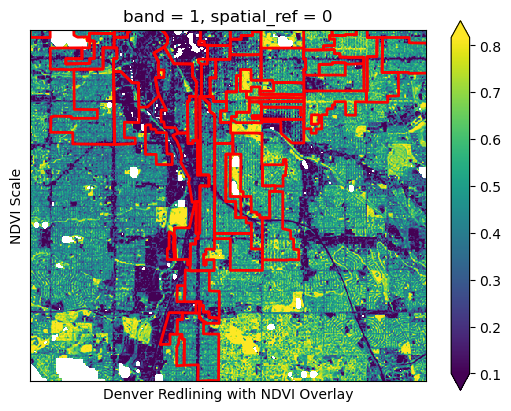

In [ ]:
ndvi_plot_da.plot(vmin=.1, robust=True)
redlining_plot_gdf.plot(ax=plt.gca(), color='none',
                         cmap='Dark2', edgecolor='Red', linewidth=2
                         )

plt.gca().set(
    xlabel='Denver Redlining with NDVI Overlay', ylabel='', xticks=[], yticks=[]
)

plt.show()

In [52]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(arg: 'None | tuple[float, float, float, float]' = None, **kwargs) -> 'matplotlib.axes.Axes'
    Add an Axes to the current figure and make it the current Axes.
    
    Call signatures::
    
        plt.axes()
        plt.axes(rect, projection=None, polar=False, **kwargs)
        plt.axes(ax)
    
    Parameters
    ----------
    arg : None or 4-tuple
        The exact behavior of this function depends on the type:
    
        - *None*: A new full window Axes is added using
          ``subplot(**kwargs)``.
        - 4-tuple of floats *rect* = ``(left, bottom, width, height)``.
          A new Axes is added with dimensions *rect* in normalized
          (0, 1) units using `~.Figure.add_axes` on the current figure.
    
    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with hvplot</div></div><div class="callout-body-container callout-body"><p>Now, do the same with <code>hvplot</code>. Note that some parameter
names are the same and some are different. Do you notice any physical
lines in the NDVI data that line up with the redlining boundaries?</p></div></div>

In [10]:
(
    ndvi_plot_da.hvplot(
        geo=True,
        xaxis=None, yaxis=None
    )
    * redlining_plot_gdf.hvplot(
        geo=True, crs=ccrs.Mercator(),
        fill_color=None)
)

:Overlay
   .Image.I    :Image   [x,y]   (value)
   .Polygons.I :Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot bands with linked subplots</div></div><div class="callout-body-container callout-body"><p>The following code will make a three panel plot with Red, NIR, and
Green bands. Why do you think we aren’t using the green band to look at
vegetation?</p></div></div>

In [12]:
raster_kwargs = dict(
    geo=True, robust=True, 
    xaxis=None, yaxis=None
)
(
    (
        band_plot_dict['Red'].hvplot(
            cmap='Reds', title='Red Reflectance', **raster_kwargs)
        + band_plot_dict['NIR'].hvplot(
            cmap='Greys', title='NIR Reflectance', **raster_kwargs)
        + band_plot_dict['Green'].hvplot(
            cmap='Greens', title='Green Reflectance', **raster_kwargs)
    )
    * redlining_plot_gdf.hvplot(
        geo=True, crs=ccrs.Mercator(),
        fill_color=None)
)

:Layout
   .Overlay.I   :Overlay
      .Image.I    :Image   [x,y]   (Red)
      .Polygons.I :Polygons   [Longitude,Latitude]
   .Overlay.II  :Overlay
      .Image.I    :Image   [x,y]   (NIR)
      .Polygons.I :Polygons   [Longitude,Latitude]
   .Overlay.III :Overlay
      .Image.I    :Image   [x,y]   (Green)
      .Polygons.I :Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot RBG</div></div><div class="callout-body-container callout-body"><p>The following code will plot an RGB image using both matplotlib and
hvplot. It also performs an action called “Contrast stretching”, and
brightens the image.</p>
<ol type="1">
<li>Read through the <code>stretch_rgb</code> function, and fill out the
<strong>docstring</strong> with the rest of the parameters and your own
descriptions. You can ask ChatGPT or another LLM to help you read the
code if needed! Please use the <a
href="https://numpydoc.readthedocs.io/en/latest/format.html">numpy style
of docstrings</a></li>
<li>Adjust the <code>low</code>, <code>high</code>, and
<code>brighten</code> numbers until you are satisfied with the image.
You can also ask ChatGPT to help you figure out what adjustments to make
by describing or uploading an image.</li>
</ol></div></div>

:RGB   [x,y]   (R,G,B)

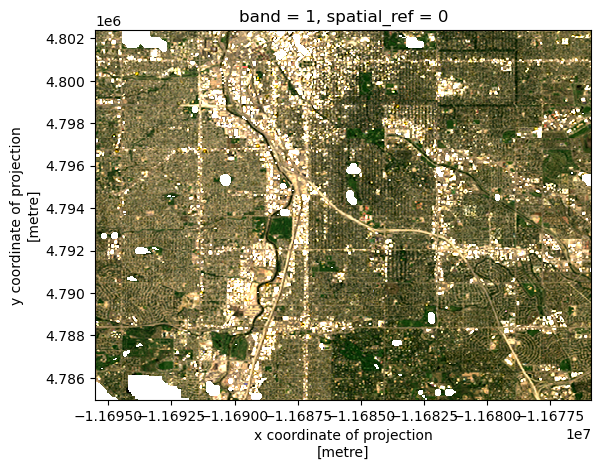

In [ ]:
rgb_da = (
    xr.concat(
        [
            band_plot_dict['Red'],
            band_plot_dict['Green'],
            band_plot_dict['Blue']
        ],
        dim='rgb')
)

def stretch_rgb(rgb_da, low, high, brighten):
    """
    Short description: Takes a RGB data array and applies a clip and brightness adjustment

    Long description:
    Takes a RGB data array and applies a clip based on  the low percentile and high percentile of the
    pixels and applies them to a function to allow user to adjust RGB image. 
     Also allows user to adjust brightness of RGB image based on a percentage
    Similar to adding robust= TRUE to HV Plot, but with more user input. 

    Parameters
    ----------
    rgb_da: array-like: 
    input RGB raster data array here
      ...
    param2: low
    Takes the low input for the percentile pix clip, 1-100 integer 

    param3: high
    Takes the high input for the percentile pix clip, 1-100 integer 

    param4: brighten
    brightens the clipped RGB by a percentage factor factor .01 to .99 float suggested
      ...

    Returns
    -------
    rgb_da: array-like
    Data array with above parameters applied 
      ...
    """
    p_low, p_high = np.nanpercentile(rgb_da, (low, high))
    rgb_da = (rgb_da - p_low)  / (p_high - p_low) + brighten
    rgb_da = rgb_da.clip(0, 1)
    return rgb_da

rgb_da = stretch_rgb(rgb_da, 2, 95, .05)

rgb_da.plot.imshow(rgb='rgb')
rgb_da.hvplot.rgb(geo=True, x='x', y='y', bands='rgb')

In [23]:
help(stretch_rgb)

Help on function stretch_rgb in module __main__:

stretch_rgb(rgb_da, low, high, brighten)
    Short description: Takes a RGB data frame, takes the low percentile and high percentile of the
    pixels and applies them to a function to allow user to adjust RGB image.  Also allows user to adjust brightness of RGB image
    Similar to adding robust= TRUE to HV Plot
    
    Long description...
    
    Parameters
    ----------
    rgb_da: array-like: 
    input RGB raster data array here
      ...
    param2: Low
    Takes the low input for the percentile pix clip, 1-100 integer 
    
    param3: High
    Takes the high input for the percentile pix clip, 1-100 integer 
    
    param4: brighten
    brightens the clipped RGB by a percentage factor factor .01 to .99 suggested
      ...
    
    Returns
    -------
    rgb_da: array-like
    Data array with above parameters applied 
      ...



<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot CIR</div></div><div class="callout-body-container callout-body"><p>Now, plot a false color RGB image. CIR images have the following
bands:</p>
<ul>
<li>red becomes NIR</li>
<li>green becomes red</li>
<li>blue becomes green</li>
</ul></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Adjust the levels</div></div><div class="callout-body-container callout-body"><p>You may notice that the NIR band in this image is very bright. Can
you adjust it so it is balanced more effectively by the other bands?</p></div></div>

:RGB   [x,y]   (R,G,B)

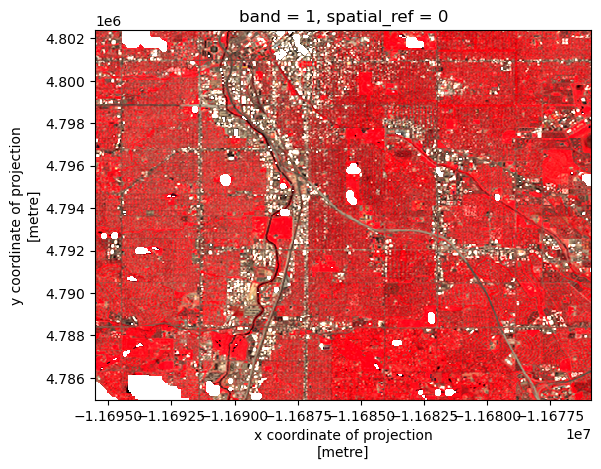

In [25]:
# Plot CIR Image
cir_da = (
    xr.concat(
        [
            band_plot_dict['NIR'],
            band_plot_dict['Red'],
            band_plot_dict['Green']
        ],
        dim='rgb')
)


cir_da = stretch_rgb(cir_da, 2, 95, .05)

cir_da.plot.imshow(rgb='rgb')
cir_da.hvplot.rgb(geo=True, x='x', y='y', bands='rgb')

In [ ]:
%store 